In [6]:
import numpy as np
import matplotlib.pyplot as plt
import block
import mdtraj as md
from sklearn.linear_model import LinearRegression
from scipy import stats
import pickle5 as pickle

In [7]:
#Make colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#66c2a5','#fc8d62','#8da0cb']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,3))

In [8]:
#List of proteins
proteins = ['hnRNPA1', 'hSUMO_hnRNPA1', 'TIA1']

#List of lambdas
lambdas = ['1.00', '1.04', '1.06', '1.08', '1.10', '1.12', '1.14']
lambdas_float = [1.0, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14]

#Cut-off for tolerable periodic image distance
PI_distance_cutoff = 1.1

#Automatic block-size selection method for block-error analysis
errmethod='hline' #Choose b3, hline or knee_loc

#Dictionary with protein experimental Rg and error: [exp_Rg, exp_err]
exp_Rg = {'hnRNPA1': [3.12, 0.022], 'hSUMO_hnRNPA1': [3.37, 0.014], 'TIA1': [2.75, 0.031]}


# Plot Rg vs lambda

/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


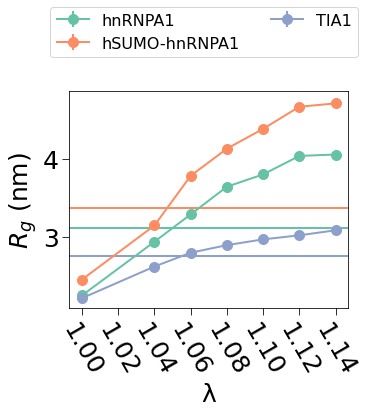

In [9]:
#Start plot
fig = plt.figure(figsize=(5,4))    
x_ticks = np.arange(1.00, 1.16, step=0.02)

lambda_mins = []
Rg_chi2_vs_protein = []

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    Rg_vs_lambda = []
    Rgerr_vs_lambda = []
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get Rg
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        
        #Calc average Rg
        Rg_avg = np.average(Rg)
        Rg_vs_lambda.append(Rg_avg)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
        Rgerr_vs_lambda.append(err)
    
    #Calculate chi2
    Rg_vs_lambda = np.array(Rg_vs_lambda)
    Rg_chi2 = np.square((Rg_vs_lambda-exp_Rg[protein][0])/exp_Rg[protein][1])
    Rg_chi2_vs_protein.append(Rg_chi2)
    
    #Find optimal lambda
    lambda_mins.append(lambdas_float[np.argmin(Rg_chi2)])
    
    #Plot Rg vs lambda
    if 'hSUMO' in protein:
        plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label='hSUMO-hnRNPA1')
    else:
        plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label=protein)
    plt.axhline(exp_Rg[protein][0], linewidth=2, color=colors[i])

#Plot settings
fig.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=2)
plt.xticks(x_ticks)
plt.xlabel('λ', fontsize=25)
plt.ylabel('$\it{R}$$_g$ (nm)', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

#Save figure
fig.savefig("figures/Rg_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Load and plot chi2 from SAXS analysis

In [10]:
## Chi2 to SAXS

#Load chi2 pickle
with open('../../IDP/Production_run/martini3saxs.pkl', "rb") as f:
    SAXSchi2_vs_proteins = pickle.load(f)
for protein in SAXSchi2_vs_proteins:
    if protein not in proteins:
        SAXSchi2_vs_proteins=SAXSchi2_vs_proteins.drop(columns=[protein])
print(SAXSchi2_vs_proteins)

           TIA1    hnRNPA1  hSUMO_hnRNPA1
1.00  57.962509  10.706891      10.908430
1.04   4.793512   1.119258       1.257298
1.06   9.419511   1.792099       2.010975
1.08  18.699577   4.007140       4.763919
1.10  30.706925   5.677182       8.535820
1.12  35.429188   7.833946      10.516491
1.14  44.512380   8.110759      11.994419


1.00    15.718390
1.04     1.202405
1.06     2.506788
1.08     4.776348
1.10     7.909972
1.12     8.785518
1.14    11.541179
dtype: float64
1.00    26.525944
1.04     2.390023
1.06     4.407528
1.08     9.156878
1.10    14.973309
1.12    17.926542
1.14    21.539186
dtype: float64


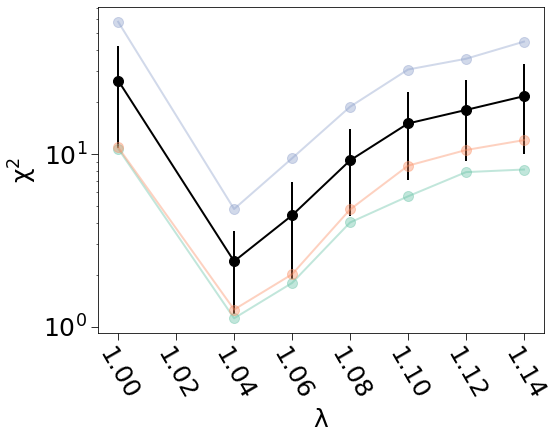

In [11]:
#Set x-ticks
x_ticks = np.arange(1.00, 1.16, step=0.02)

#Get average chi2 over all proteins and SEM
SAXSchi2_average = SAXSchi2_vs_proteins.mean(axis=1)
SAXSchi2_err = SAXSchi2_vs_proteins.sem(axis=1)

#Start plot
fig = plt.figure(figsize=(8,6))
plt.xlabel('λ', fontsize=25)
plt.ylabel('χ$^{2}$', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.xticks(x_ticks)
plt.yscale('log')

#Loop through proteins and plot
for i,protein in enumerate(proteins):
    plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], alpha=0.4, label=protein)

#Plot average chi2 with error
plt.errorbar(lambdas_float, SAXSchi2_average, yerr=SAXSchi2_err, fmt='-o', linewidth=2, markersize=10, color='black')

#Save figure
fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=300)
fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=300)

#Print chi2 and err
print(SAXSchi2_err)
print(SAXSchi2_average)


# Plot Rg distributions

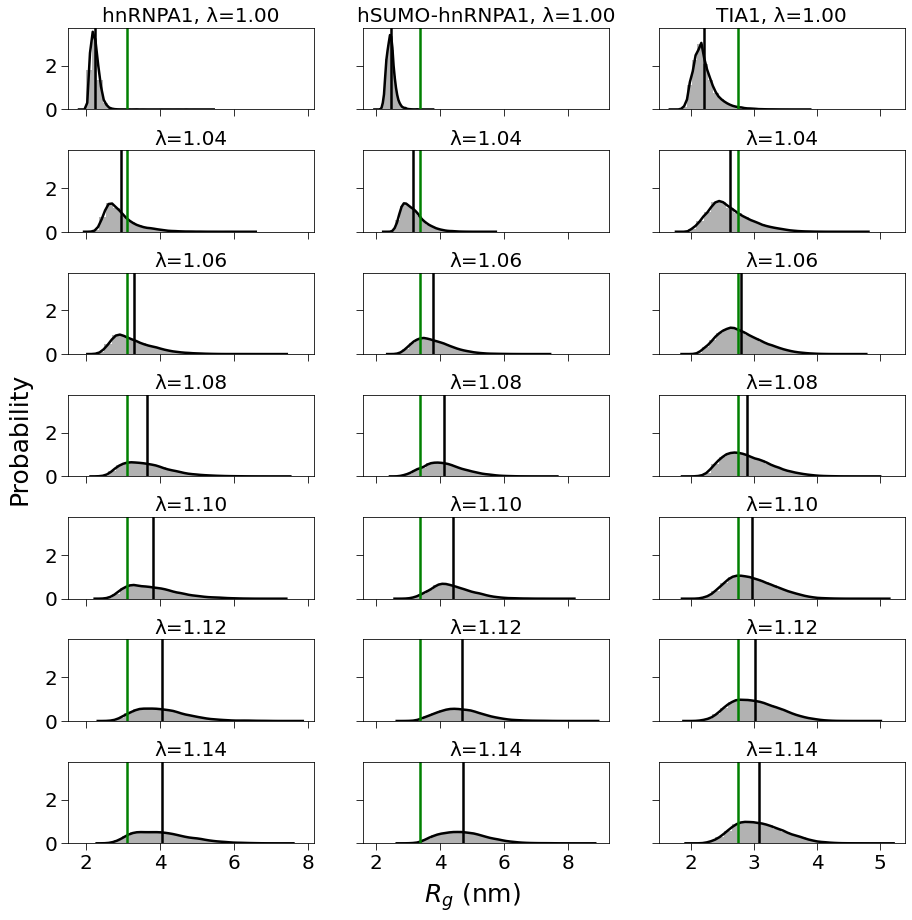

In [12]:
#Start plot
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins), sharey='all', sharex='col')    
plt.subplots_adjust(hspace = 0.50)
fig.text(0.5, 0.09, '$\it{R}$$_g$ (nm)', ha='center', va='top', fontsize=25)
fig.text(0.08, 0.5, 'Probability', ha='center', va='center', fontsize=25, rotation=90)

n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get Rg
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)

        #Do KDE
        kde_x = np.linspace( np.amin(Rg)*0.9, np.amax(Rg)*1.1, num = 50 )
        kde_y = stats.gaussian_kde(Rg, bw_method = "silverman").evaluate(kde_x)
        
        #Plot histogram and KDE
        ax[k,n].hist(Rg, density=True, color='black', alpha=0.3, bins=20)
        ax[k,n].plot(kde_x, kde_y, '-', linewidth=2.5, color='black')
        
        #Plot average and experimental
        ax[k,n].axvline(np.average(Rg),linewidth=2.5, alpha=1, color='black', label='Average')
        ax[k,n].axvline(exp_Rg[protein][0],linewidth=2.5, alpha=1, color='green', label='Experimental')
        
        #Set title for top row
        if k == 0:
            if 'hSUMO' in protein:
                ax[k,n].set_title('%s, λ=%s' % ('hSUMO-hnRNPA1', str(l)), fontsize=20)
            else:
                ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=20)
        #Set title for other rows
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=20)
        
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=20)
        
        k+=1
    n+=1

#Save figure
fig.savefig("figures/Rg_distributions.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_distributions.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Check distance to periodic image

WARNING! hSUMO_hnRNPA1 with lambda 1.12 comes within 1.092000 nm of its periodic image.


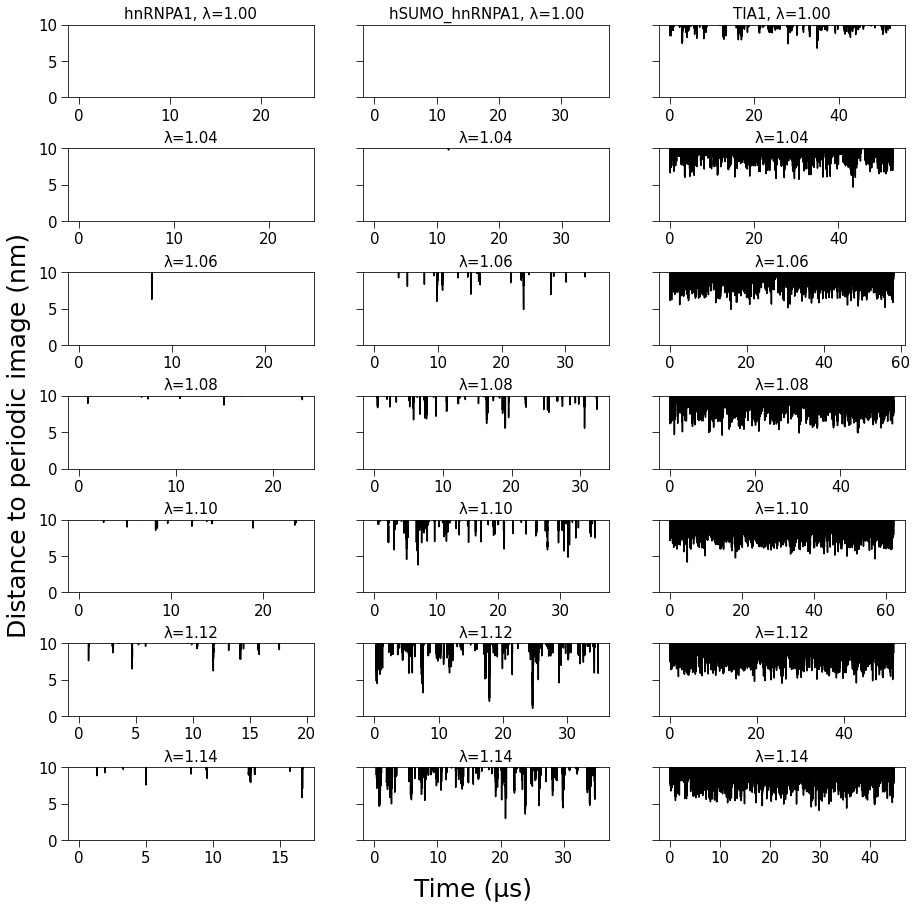

In [13]:
#Make outfile to log proteins that come too close to PI
PI_warning_outfile='PI_distance_warnings.log'
with open(PI_warning_outfile,'w') as f:
    f.write("# Simulations with distance to PI below the cut-off \n# Protein \tLambda \tShortest_dist_PI (nm) \n")

#Start plot
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins), sharey='all')    
plt.subplots_adjust(hspace = 0.70)
fig.text(0.5, 0.09, 'Time (µs)', ha='center', va='top', fontsize=25)
fig.text(0.08, 0.5, 'Distance to periodic image (nm)', ha='center', va='center', fontsize=25, rotation=90)

n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get distance to PI over time
        time, distance = np.genfromtxt('%s/lambda_%s/pi_mindist.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=29, unpack=True)
            
        #Find shortest distance and check if it is below the acceptable distance
        minimum_distance = np.amin(distance)
        if minimum_distance <= PI_distance_cutoff:
            print("WARNING! %s with lambda %s comes within %f nm of its periodic image." % (str(protein), str(l), minimum_distance))
            #Write to outfile
            with open(PI_warning_outfile, 'a') as f:
                f.write("%s \t%s \t%f \n" % (str(protein), str(l), minimum_distance))
                
        #Plot distance to PI vs time
        ax[k,n].plot(time, distance, '-', color='black')
        
        #Set title for top row
        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=15)
        #Set title for other rows
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
            
        #Plot stuff
        ax[k,n].set_ylim(0,10)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        
        k+=1
    n+=1

#Save figure
fig.savefig("figures/PI_distances.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/PI_distances.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Get box dimensions and number of atoms

In [14]:
for protein in proteins:
    
    #Read EM gro-file
    with open(f'{protein}/min.gro', 'r') as f:
        lines = f.readlines()
    
    #Get box d
    box_line = lines[len(lines)-1].split()
    box_d = box_line[0]
    print(f'{protein}: d = {box_d} nm')


hnRNPA1: d = 28.62143 nm
hSUMO_hnRNPA1: d = 29.11115 nm
TIA1: d = 17.89561 nm


# Check Rg convergence

Possible blocks transformations: 24
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 24
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 40



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 16

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 8

Removing 4 at the bottom of each replica
Possible blocks transformations: 8

Removing 5 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 6

Removing 4 at the bottom of each replica
Possible blocks transformations: 6

Removing 5 at the bottom of each replica
Possible blocks transformations: 16

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 48



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 14

Removing 2 at the bottom of each replica
Possible blocks transformations: 12

Removing 3 at the bottom of each replica
Possible blocks transformations: 16

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 12

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 16

Removing 8 at the bottom of each replica
Possible blocks transformations: 4

Removing 9 at the bottom of each replica
Possible blocks transformations: 16

Removing 10 at the bottom of each replica
Possible blocks transformations: 4

Removing 11 at the bottom of each replica
Possible blocks transformations: 12

Removing 12 at the bottom of each replica
Possible blocks transformations: 4

Removing 13 at the bottom of each replica
Possible blocks transfor

/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 16

Removing 3 at the bottom of each replica
Possible blocks transformations: 12

Removing 4 at the bottom of each replica
Possible blocks transformations: 6

Removing 5 at the bottom of each replica
Possible blocks transformations: 4

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 8

Removing 8 at the bottom of each replica
Possible blocks transformations: 42



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 14

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 16

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 6

Removing 6 at the bottom of each replica
Possible blocks transformations: 6

Removing 7 at the bottom of each replica
Possible blocks transformations: 4

Removing 8 at the bottom of each replica
Possible blocks transformations: 12

Removing 9 at the bottom of each replica
Possible blocks transformations: 32



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 16

Removing 2 at the bottom of each replica
Possible blocks transformations: 6

Removing 3 at the bottom of each replica
Possible blocks transformations: 10

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 4

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 36



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 24
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 24
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 12

Removing 3 at the bottom of each replica
Possible blocks transformations: 12

Removing 4 at the bottom of each replica
Possible blocks transformations: 2

Removing 5 at the bottom of each replica
Possible blocks transformations: 16

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 16

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 6

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 32



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 16

Removing 3 at the bottom of each replica
Possible blocks transformations: 4

Removing 4 at the bottom of each replica
Possible blocks transformations: 16

Removing 5 at the bottom of each replica
Possible blocks transformations: 8

Removing 6 at the bottom of each replica
Possible blocks transformations: 4

Removing 7 at the bottom of each replica
Possible blocks transformations: 2

Removing 8 at the bottom of each replica
Possible blocks transformations: 12

Removing 9 at the bottom of each replica
Possible blocks transformations: 12

Removing 10 at the bottom of each replica
Possible blocks transformations: 16

Removing 11 at the bottom of each replica
Possible blocks transformations: 6

Removing 12 at the bottom of each replica
Possible blocks transformations: 20



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 10

Removing 3 at the bottom of each replica
Possible blocks transformations: 12

Removing 4 at the bottom of each replica
Possible blocks transformations: 8

Removing 5 at the bottom of each replica
Possible blocks transformations: 8

Removing 6 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 48
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 4

Removing 2 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 16

Removing 2 at the bottom of each replica
Possible blocks transformations: 16

Removing 3 at the bottom of each replica
Possible blocks transformations: 2

Removing 4 at the bottom of each replica
Possible blocks transformations: 32



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 48
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


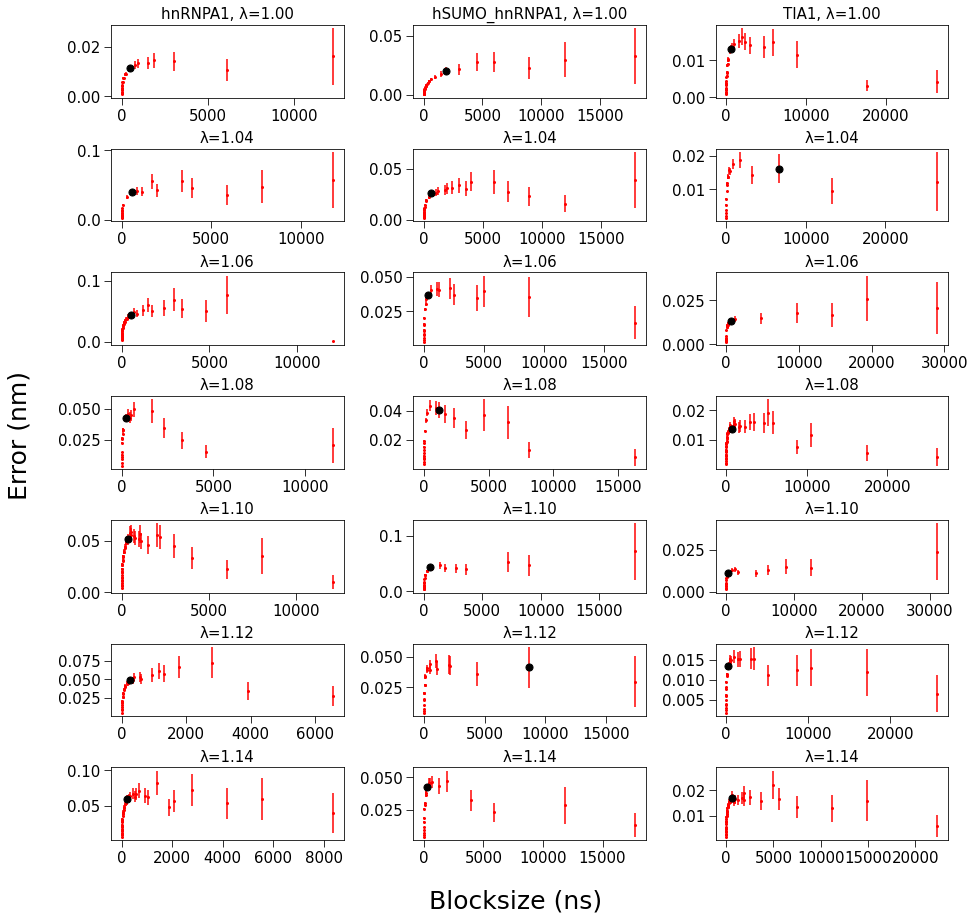

In [15]:
#Start plot
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins))    
plt.subplots_adjust(hspace = 0.70, wspace = 0.3)
fig.text(0.5, 0.08, 'Blocksize (ns)', ha='center', va='top', fontsize=25)
fig.text(0.04, 0.5, 'Error (nm)', ha='center', va='center', fontsize=25, rotation=90)
    
n = 0

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get Rg
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)      
        
        #Trim Rg array for block error analysis
        Rg = block.check(Rg, multi=1)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        
        #Choose optimal block size and find error
        if errmethod=='b3':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="b3")
        elif errmethod=='knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
        elif errmethod=='hline':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="hline")
        
        #Plot
        ax[k,n].errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',ms=2)

        #Set title for top row
        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(proteins[i]), str(l)), fontsize=15)
        #Set title for other rows 
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)

        #Plot chosen block-size and error
        ax[k,n].scatter(corr_len,err,c='k',zorder=300,s=50)
        
        k+=1
    n+=1

#Save figure
fig.savefig("figures/Rg_blockerror.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_blockerror.pdf", bbox_inches='tight', pad_inches=1, dpi=400)